# SET: 23-Sepetember-November-December


In [30]:
# Importing standard data analysis and visualization libraries
import pandas as pd  # For data manipulation and analysis
from PIL import Image


# Importing custom utility functions for specific data processing tasks
from Utils_ipynb import (
    append_csv_files_from_subfolders,  # Function to concatenate CSV files from subfolders
    extract_and_append_image_info,  # Function to extract and append image information from data
    refine_and_filter_data , # Function to refine and further filter data
)

## Data Preparation

### Step 1: Data Read
- **Objective**: Combine 'cell_stat.csv' files from various subdirectories within a specified root folder into a single DataFrame.
- **Context**: This step aggregates data collected from parallel analyses conducted on the Borah cluster.
- **Data Format**: Each 'cell_stat.csv' file contains [brief description of data, like columns and typical values].
- **Note**: [Any specific filters or considerations applied during aggregation, if applicable].



In [31]:
# Read files from each subdirctory
root_folder = r'C:\Users\nnina\Documents\BioLab_C\Current_experiments_C\Anamaria_3d_experiment_C\nucleus-data-3sets\analysis_data'
combined_df = append_csv_files_from_subfolders(root_folder)
combined_df

,Image_name,Img_num,Cell_num,"Nucleus_volume, cubic_micrometre","Nucleus_cylinder, pixels_number","Nucleus_length, micrometre","Nucleus_width, micrometre","Nucleus_high, micrometre",Cy5-T1 av_signal_in_nuc_area_3D,Cy5-T1 sum_pix_in_nuc_cylinder,Cy5-T1 has ring,Cy5-T1 ring intensity coef,AF594-T2 av_signal_in_nuc_area_3D,AF594-T2 sum_pix_in_nuc_cylinder,AF594-T2 has ring,AF594-T2 ring intensity coef,AF488-T3 av_signal_in_nuc_area_3D,AF488-T3 sum_pix_in_nuc_cylinder,AF488-T3 has ring,AF488-T3 ring intensity coef
0,LSM-23-12-04 KASH+doxy -LIV 10uM 6x vib 0hr-09...,0,0,559.755628,799051,15.904460,27.556390,2.99,6307.528919,4676354384,False,0.814233,1839.474173,1858423836,True,1.318927,138.699717,130667514,False,0.841530
1,LSM-23-12-04 KASH+doxy -LIV 10uM 6x vib 0hr-09...,0,1,631.963108,898212,18.626078,26.195580,3.22,10091.471359,5482371439,False,0.857690,2233.905491,1473709385,True,1.119884,245.158899,172234804,False,0.968735
2,LSM-23-12-04 KASH+doxy -LIV 10uM 6x vib 0hr-09...,0,2,1227.675236,1443997,20.071938,39.123269,3.22,9014.743327,12394490392,False,0.855102,137.354830,223712140,False,0.906211,260.932090,395337193,False,0.803752
3,LSM-23-12-04 KASH +doxy +LIV 10uM 6x vib 0hr-0...,1,0,400.402049,658368,13.352942,18.881230,3.91,6078.612979,2695446244,False,0.943498,1349.495760,806211454,True,1.564013,274.569543,137227919,False,0.744065
4,LSM-23-12-04 KASH +doxy +LIV 10uM 6x vib 0hr-0...,1,1,1340.693976,2765424,26.365682,40.058826,3.45,6359.791114,8956508979,False,0.760375,1589.545413,3010641687,True,1.334633,188.245321,349524317,False,0.820340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6347,LSM-23-9-15 MSC -LIV -Cisplatin 0hr-01.czi,19,1,796.347801,1621598,21.517798,31.553767,3.68,3589.532457,4057814887,False,0.847436,108.618155,172366379,False,0.991659,5416.386130,6979384534,True,1.123104
6348,LSM-23-9-15 MSC -LIV -Cisplatin 0hr-01.czi,19,2,389.109492,1085546,16.074561,28.321845,2.99,3541.889913,1985874013,False,0.816515,122.950908,104945232,False,0.986202,4986.161340,3212641093,True,1.033002
6349,LSM-23-9-15 MSC -LIV -Cisplatin 0hr-01.czi,19,3,317.338740,759814,13.863245,22.708506,2.76,4323.809504,1947969840,False,0.947434,115.202550,75891614,False,0.949578,6077.384026,3223250257,True,1.183160
6350,LSM-23-9-15 MSC -LIV -Cisplatin 0hr-01.czi,19,4,1291.550764,2915462,32.999627,36.826904,3.22,5350.776754,7636632638,False,0.955921,143.982338,298821792,False,0.983621,5662.967462,9416635623,True,1.141315


#### Step 2: Extraction of Experimental Setup and Group Information from Image Names
Extraction detailed information about the experimental setup and group, as well as the processing type, directly from the 'Image_name' column in our DataFrame. This is achieved through the extract_and_append_image_info function. The 'Image_name' column is a rich source of data, encapsulating key aspects of the experiment and image processing in a condensed format:
- Processing: Indicates the type of image processing used, such as 'RAW' or 'LSM'.
- Date: The date when the image was captured.
- Time: Time point of the experiment, typically 0, 24, or 48 hours.
- Cell Type: Identifies the cell type, e.g., 'KASH', 'KASH+doxy', or 'MSC'.
- LIV: Indicates the presence (+LIV) or absence (-LIV) of LIV in the sample.
- Cisp: Shows the concentration of Cisplatin used, or 'Control' if not applicable.

In [32]:
enhanced_df = extract_and_append_image_info(combined_df, 'Image_name')
enhanced_df

,Image_name,Base_image_name,Processing,Date,Time,Cell Type,LIV,Cisp,Img_num,Cell_num,...,Cy5-T1 has ring,Cy5-T1 ring intensity coef,AF594-T2 av_signal_in_nuc_area_3D,AF594-T2 sum_pix_in_nuc_cylinder,AF594-T2 has ring,AF594-T2 ring intensity coef,AF488-T3 av_signal_in_nuc_area_3D,AF488-T3 sum_pix_in_nuc_cylinder,AF488-T3 has ring,AF488-T3 ring intensity coef
0,LSM-23-12-04 KASH+doxy -LIV 10uM 6x vib 0hr-09...,lsm-23-12-04kash+doxy-liv10um6xvib0hr-09,LSM,23-12-04,0,KASH+doxy,-LIV,10um,0,0,...,False,0.814233,1839.474173,1858423836,True,1.318927,138.699717,130667514,False,0.841530
1,LSM-23-12-04 KASH+doxy -LIV 10uM 6x vib 0hr-09...,lsm-23-12-04kash+doxy-liv10um6xvib0hr-09,LSM,23-12-04,0,KASH+doxy,-LIV,10um,0,1,...,False,0.857690,2233.905491,1473709385,True,1.119884,245.158899,172234804,False,0.968735
2,LSM-23-12-04 KASH+doxy -LIV 10uM 6x vib 0hr-09...,lsm-23-12-04kash+doxy-liv10um6xvib0hr-09,LSM,23-12-04,0,KASH+doxy,-LIV,10um,0,2,...,False,0.855102,137.354830,223712140,False,0.906211,260.932090,395337193,False,0.803752
3,LSM-23-12-04 KASH +doxy +LIV 10uM 6x vib 0hr-0...,lsm-23-12-04kash+doxy+liv10um6xvib0hr-08,LSM,23-12-04,0,KASH+doxy,+LIV,10um,1,0,...,False,0.943498,1349.495760,806211454,True,1.564013,274.569543,137227919,False,0.744065
4,LSM-23-12-04 KASH +doxy +LIV 10uM 6x vib 0hr-0...,lsm-23-12-04kash+doxy+liv10um6xvib0hr-08,LSM,23-12-04,0,KASH+doxy,+LIV,10um,1,1,...,False,0.760375,1589.545413,3010641687,True,1.334633,188.245321,349524317,False,0.820340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6347,LSM-23-9-15 MSC -LIV -Cisplatin 0hr-01.czi,lsm-23-9-15msc-liv-cisplatin0hr-01,LSM,23-9-15,0,MSC,-LIV,-cisplatin,19,1,...,False,0.847436,108.618155,172366379,False,0.991659,5416.386130,6979384534,True,1.123104
6348,LSM-23-9-15 MSC -LIV -Cisplatin 0hr-01.czi,lsm-23-9-15msc-liv-cisplatin0hr-01,LSM,23-9-15,0,MSC,-LIV,-cisplatin,19,2,...,False,0.816515,122.950908,104945232,False,0.986202,4986.161340,3212641093,True,1.033002
6349,LSM-23-9-15 MSC -LIV -Cisplatin 0hr-01.czi,lsm-23-9-15msc-liv-cisplatin0hr-01,LSM,23-9-15,0,MSC,-LIV,-cisplatin,19,3,...,False,0.947434,115.202550,75891614,False,0.949578,6077.384026,3223250257,True,1.183160
6350,LSM-23-9-15 MSC -LIV -Cisplatin 0hr-01.czi,lsm-23-9-15msc-liv-cisplatin0hr-01,LSM,23-9-15,0,MSC,-LIV,-cisplatin,19,4,...,False,0.955921,143.982338,298821792,False,0.983621,5662.967462,9416635623,True,1.141315


#### Step 3: Removing Inaccurate Nuclei Detections
Although the 3D Signal Detector generally performs well in identifying signals within the nucleus area, manual verification of each image is still necessary. This step ensures the accurate processing of nuclei, particularly for retaining edge cells. While edge cells are often removed, some that are barely touching the image's edge may be viable for analysis and are, therefore, preserved.

Another challenge involves distinguishing between dividing nuclei and those with irregular shapes. While automation is possible for this task, we have chosen to assess the processed data manually. This assessment involves examining each image's maximum projection, focusing on specific cut-out areas and the mesh of nuclei.

Any cells identified for removal are listed in a CSV file with columns "Image_name" and "Cell_num". This file serves as a record of cells excluded from the analysis.

In [33]:
remove_nuclei_path = r"C:\Users\nnina\Documents\BioLab_C\Current_experiments_C\Anamaria_3d_experiment_C\nucleus-data-3sets\cells_to_remove.xlsx"
remove_df = pd.read_excel(remove_nuclei_path)
remove_df

,Image_name,Cell_num
0,LSM-23-9-15 KASH -LIV 10uM 6x vib 0hr-19_img-n...,2
1,LSM-23-9-15 KASH +LIV 10uM 6x vib 0hr-31_img-n...,0
2,LSM-23-9-15 KASH +LIV 10uM 6x vib 0hr-33_img-n...,0
3,LSM-23-9-15 KASH +LIV 10uM 6x vib 0hr-43_img-n...,0
4,LSM-23-9-15 KASH -LIV 10uM 6x vib 24hr-07_img-...,4
...,...,...
406,LSM-23-12-04 MSC +LIV 10um 6x vib 0hr-44_img-n...,1
407,LSM-23-12-04 MSC +LIV 10um 6x vib 24hr-08_img-...,2
408,LSM-23-12-04 MSC +LIV 10um 6x vib 48r-15_img-n...,0
409,LSM-23-12-04 MSC +LIV 10um 6x vib 48r-34_img-n...,0


In [34]:
enhanced_remove_df = extract_and_append_image_info(remove_df, 'Image_name')
enhanced_remove_df

,Image_name,Base_image_name,Processing,Date,Time,Cell Type,LIV,Cisp,Cell_num
0,LSM-23-9-15 KASH -LIV 10uM 6x vib 0hr-19_img-n...,lsm-23-9-15kash-liv10um6xvib0hr-19,LSM,23-9-15,0,KASH,-LIV,10um,2
1,LSM-23-9-15 KASH +LIV 10uM 6x vib 0hr-31_img-n...,lsm-23-9-15kash+liv10um6xvib0hr-31,LSM,23-9-15,0,KASH,+LIV,10um,0
2,LSM-23-9-15 KASH +LIV 10uM 6x vib 0hr-33_img-n...,lsm-23-9-15kash+liv10um6xvib0hr-33,LSM,23-9-15,0,KASH,+LIV,10um,0
3,LSM-23-9-15 KASH +LIV 10uM 6x vib 0hr-43_img-n...,lsm-23-9-15kash+liv10um6xvib0hr-43,LSM,23-9-15,0,KASH,+LIV,10um,0
4,LSM-23-9-15 KASH -LIV 10uM 6x vib 24hr-07_img-...,lsm-23-9-15kash-liv10um6xvib24hr-07,LSM,23-9-15,24,KASH,-LIV,10um,4
...,...,...,...,...,...,...,...,...,...
406,LSM-23-12-04 MSC +LIV 10um 6x vib 0hr-44_img-n...,lsm-23-12-04msc+liv10um6xvib0hr-44,LSM,23-12-04,0,MSC,+LIV,10um,1
407,LSM-23-12-04 MSC +LIV 10um 6x vib 24hr-08_img-...,lsm-23-12-04msc+liv10um6xvib24hr-08,LSM,23-12-04,24,MSC,+LIV,10um,2
408,LSM-23-12-04 MSC +LIV 10um 6x vib 48r-15_img-n...,lsm-23-12-04msc+liv10um6xvib48r-15,LSM,23-12-04,48,MSC,+LIV,10um,0
409,LSM-23-12-04 MSC +LIV 10um 6x vib 48r-34_img-n...,lsm-23-12-04msc+liv10um6xvib48r-34,LSM,23-12-04,48,MSC,+LIV,10um,0


In [35]:
with pd.ExcelWriter(r'removed_cells_data.xlsx') as writer:
    enhanced_remove_df.to_excel(writer, index=False)

In [36]:
columns_to_compare = ['Base_image_name', 'Processing', 'Date', 'Time', 'Cell Type', 'LIV', 'Cisp', 'Cell_num']

# Perform a left anti join
enhanced_df = enhanced_df.merge(enhanced_remove_df[columns_to_compare], on=columns_to_compare, how='left', indicator=True)
enhanced_df = enhanced_df[enhanced_df['_merge'] == 'left_only'].drop('_merge', axis=1)
enhanced_df

,Image_name,Base_image_name,Processing,Date,Time,Cell Type,LIV,Cisp,Img_num,Cell_num,...,Cy5-T1 has ring,Cy5-T1 ring intensity coef,AF594-T2 av_signal_in_nuc_area_3D,AF594-T2 sum_pix_in_nuc_cylinder,AF594-T2 has ring,AF594-T2 ring intensity coef,AF488-T3 av_signal_in_nuc_area_3D,AF488-T3 sum_pix_in_nuc_cylinder,AF488-T3 has ring,AF488-T3 ring intensity coef
0,LSM-23-12-04 KASH+doxy -LIV 10uM 6x vib 0hr-09...,lsm-23-12-04kash+doxy-liv10um6xvib0hr-09,LSM,23-12-04,0,KASH+doxy,-LIV,10um,0,0,...,False,0.814233,1839.474173,1858423836,True,1.318927,138.699717,130667514,False,0.841530
1,LSM-23-12-04 KASH+doxy -LIV 10uM 6x vib 0hr-09...,lsm-23-12-04kash+doxy-liv10um6xvib0hr-09,LSM,23-12-04,0,KASH+doxy,-LIV,10um,0,1,...,False,0.857690,2233.905491,1473709385,True,1.119884,245.158899,172234804,False,0.968735
3,LSM-23-12-04 KASH +doxy +LIV 10uM 6x vib 0hr-0...,lsm-23-12-04kash+doxy+liv10um6xvib0hr-08,LSM,23-12-04,0,KASH+doxy,+LIV,10um,1,0,...,False,0.943498,1349.495760,806211454,True,1.564013,274.569543,137227919,False,0.744065
4,LSM-23-12-04 KASH +doxy +LIV 10uM 6x vib 0hr-0...,lsm-23-12-04kash+doxy+liv10um6xvib0hr-08,LSM,23-12-04,0,KASH+doxy,+LIV,10um,1,1,...,False,0.760375,1589.545413,3010641687,True,1.334633,188.245321,349524317,False,0.820340
5,LSM-23-12-04 KASH +doxy +LIV 10uM 6x vib 0hr-0...,lsm-23-12-04kash+doxy+liv10um6xvib0hr-08,LSM,23-12-04,0,KASH+doxy,+LIV,10um,1,2,...,False,0.900143,1653.587689,904032334,True,1.604931,317.853801,153521248,False,0.723722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6349,LSM-23-9-15 MSC -LIV -Cisplatin 0hr-01.czi,lsm-23-9-15msc-liv-cisplatin0hr-01,LSM,23-9-15,0,MSC,-LIV,-cisplatin,19,1,...,False,0.847436,108.618155,172366379,False,0.991659,5416.386130,6979384534,True,1.123104
6350,LSM-23-9-15 MSC -LIV -Cisplatin 0hr-01.czi,lsm-23-9-15msc-liv-cisplatin0hr-01,LSM,23-9-15,0,MSC,-LIV,-cisplatin,19,2,...,False,0.816515,122.950908,104945232,False,0.986202,4986.161340,3212641093,True,1.033002
6351,LSM-23-9-15 MSC -LIV -Cisplatin 0hr-01.czi,lsm-23-9-15msc-liv-cisplatin0hr-01,LSM,23-9-15,0,MSC,-LIV,-cisplatin,19,3,...,False,0.947434,115.202550,75891614,False,0.949578,6077.384026,3223250257,True,1.183160
6352,LSM-23-9-15 MSC -LIV -Cisplatin 0hr-01.czi,lsm-23-9-15msc-liv-cisplatin0hr-01,LSM,23-9-15,0,MSC,-LIV,-cisplatin,19,4,...,False,0.955921,143.982338,298821792,False,0.983621,5662.967462,9416635623,True,1.141315


## Step 4: Data Filtering and Refinement
In this section, we aim to streamline our dataset for more efficient analysis. The objectives are:
1. Remove any columns that are not relevant to our analysis to simplify the dataset.
2. Create new columns that will aid in deeper insights and facilitate a more thorough examination of the data.
3. Rename existing columns for clarity and better understanding. This involves modifying column names so that they accurately describe the data they represent, making the dataset more intuitive for anyone reviewing this analysis.


In [37]:
# Define the pixel size in microns
pixel_size = 0.085 * 0.085 * 0.230  # in cubic microns

refined_df = refine_and_filter_data(enhanced_df, pixel_size)

In [38]:
refined_df

,Base_image_name,Processing,Date,Time,Cell Type,LIV,Cisp,Img_num,Cell_num,Nucleus_volume,Nucleus_length,Nucleus_width,Nucleus_height,Average_signal_594,Ring_coefficient,Average_signal_488,Total_signal_488,Group
0,lsm-23-12-04kash+doxy-liv10um6xvib0hr-09,LSM,23-12-04,0,KASH+doxy,-LIV,10um,0,0,559.755628,15.904460,27.556390,2.99,1839.474173,1.318927,138.699717,4.672059e+07,KASH+doxy_-LIV_10um_0hr
1,lsm-23-12-04kash+doxy-liv10um6xvib0hr-09,LSM,23-12-04,0,KASH+doxy,-LIV,10um,0,1,631.963108,18.626078,26.195580,3.22,2233.905491,1.119884,245.158899,9.323387e+07,KASH+doxy_-LIV_10um_0hr
3,lsm-23-12-04kash+doxy+liv10um6xvib0hr-08,LSM,23-12-04,0,KASH+doxy,+LIV,10um,1,0,400.402049,13.352942,18.881230,3.91,1349.495760,1.564013,274.569543,6.615809e+07,KASH+doxy_+LIV_10um_0hr
4,lsm-23-12-04kash+doxy+liv10um6xvib0hr-08,LSM,23-12-04,0,KASH+doxy,+LIV,10um,1,1,1340.693976,26.365682,40.058826,3.45,1589.545413,1.334633,188.245321,1.518757e+08,KASH+doxy_+LIV_10um_0hr
5,lsm-23-12-04kash+doxy+liv10um6xvib0hr-08,LSM,23-12-04,0,KASH+doxy,+LIV,10um,1,2,459.460251,13.948296,17.690522,4.37,1653.587689,1.604931,317.853801,8.788397e+07,KASH+doxy_+LIV_10um_0hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6349,lsm-23-9-15msc-liv-cisplatin0hr-01,LSM,23-9-15,0,MSC,-LIV,-cisplatin,19,1,796.347801,21.517798,31.553767,3.68,108.618155,0.991659,5416.386130,2.595653e+09,MSC_-LIV_-cisplatin_0hr
6350,lsm-23-9-15msc-liv-cisplatin0hr-01,LSM,23-9-15,0,MSC,-LIV,-cisplatin,19,2,389.109492,16.074561,28.321845,2.99,122.950908,0.986202,4986.161340,1.167542e+09,MSC_-LIV_-cisplatin_0hr
6351,lsm-23-9-15msc-liv-cisplatin0hr-01,LSM,23-9-15,0,MSC,-LIV,-cisplatin,19,3,317.338740,13.863245,22.708506,2.76,115.202550,0.949578,6077.384026,1.160577e+09,MSC_-LIV_-cisplatin_0hr
6352,lsm-23-9-15msc-liv-cisplatin0hr-01,LSM,23-9-15,0,MSC,-LIV,-cisplatin,19,4,1291.550764,32.999627,36.826904,3.22,143.982338,0.983621,5662.967462,4.401390e+09,MSC_-LIV_-cisplatin_0hr


In [39]:
# In the initial code length and width are not correctly placed, so width can be larger than length
# We will correct this by swapping the values where width is larger than length
# Create a code that swaps the values where width is larger than length in refined_df ['Nucleus_length', 'Nucleus_width']

# Swap the values where 'Nucleus_width' is greater than 'Nucleus_length'
condition = refined_df['Nucleus_width'] > refined_df['Nucleus_length']
refined_df.loc[condition, ['Nucleus_length', 'Nucleus_width']] = refined_df.loc[condition, ['Nucleus_width', 'Nucleus_length']].values


In [40]:
with pd.ExcelWriter(r'refined_data.xlsx') as writer:
    refined_df.to_excel(writer, index=False)

### Filter KASH and Non-KASH cells

Based on the test, when we plot manual labeling and pixel intensity versus ring coefficient, we observe distinct patterns for KASH and non-KASH cells. True KASH cells exhibit either a pixel intensity greater than 500 or a ring coefficient of 1.5. Non-KASH cells display pixel intensities less than 400 and ring coefficients below 1.1, or pixel intensities less than 300. The remaining cells fall into a grey area, which we exclude from the analysis.

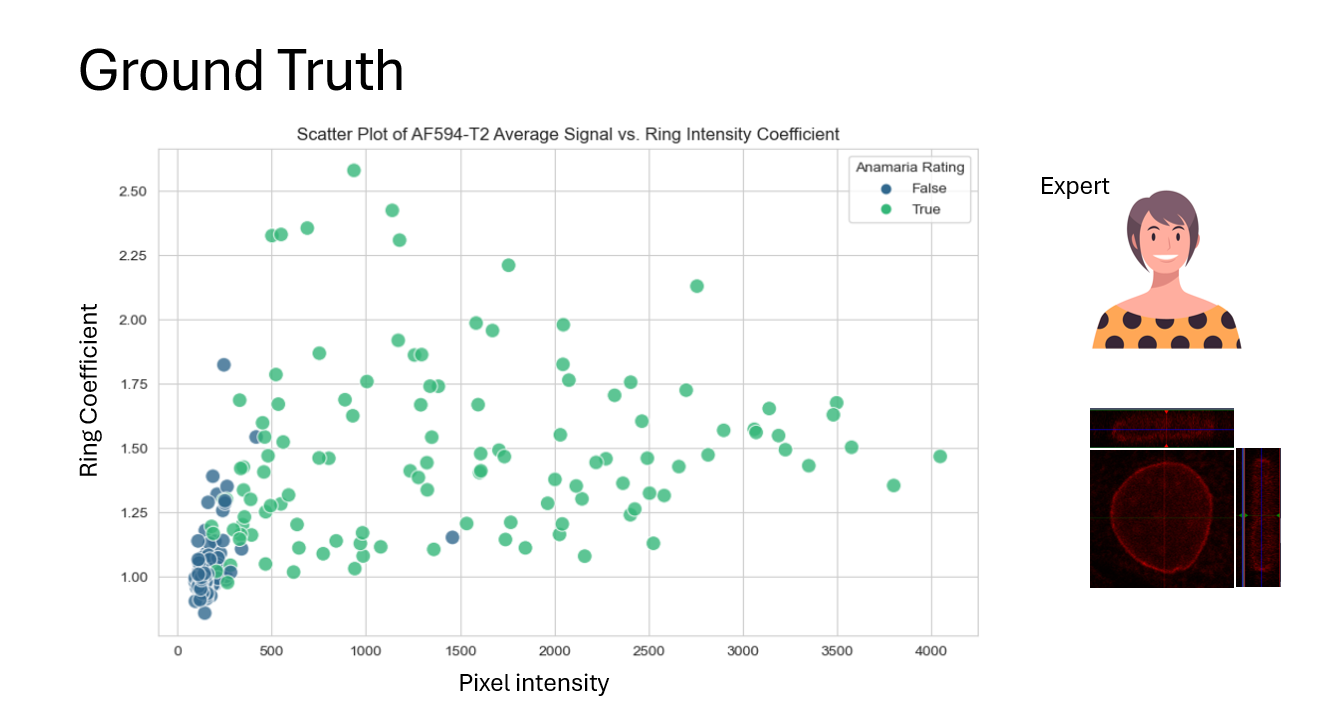

In [41]:
# Insert image KASH_conditions.png
img = Image.open(r'KASH_conditions.png')
img

In [42]:
# for refined_df based on columns 'Average_signal_594' and 'Ring_coefficient' filter KASH and non-KASH cells,

# Define the conditions for KASH and non-KASH cells
kash_condition = (refined_df['Average_signal_594'] > 500) | (refined_df['Ring_coefficient'] > 1.5)
non_kash_condition = ((refined_df['Average_signal_594'] < 400) & (refined_df['Ring_coefficient'] < 1.1)) | (refined_df['Average_signal_594'] < 300)


In [43]:
# Filter KASH cells based on the defined condition and column 'Cell Type' == 'KASH+doxy' and non-kash based on the defined condition and column 'Cell Type' == 'MSC' or 'KASH'
kash_df = refined_df[kash_condition & (refined_df['Cell Type'] == 'KASH+doxy')]
non_kash_df = refined_df[non_kash_condition & ((refined_df['Cell Type'] == 'MSC') | (refined_df['Cell Type'] == 'KASH'))]
#Combine the two dataframes
kash_non_kash_df = pd.concat([kash_df, non_kash_df])
kash_non_kash_df

,Base_image_name,Processing,Date,Time,Cell Type,LIV,Cisp,Img_num,Cell_num,Nucleus_volume,Nucleus_length,Nucleus_width,Nucleus_height,Average_signal_594,Ring_coefficient,Average_signal_488,Total_signal_488,Group
0,lsm-23-12-04kash+doxy-liv10um6xvib0hr-09,LSM,23-12-04,0,KASH+doxy,-LIV,10um,0,0,559.755628,27.556390,15.904460,2.99,1839.474173,1.318927,138.699717,4.672059e+07,KASH+doxy_-LIV_10um_0hr
1,lsm-23-12-04kash+doxy-liv10um6xvib0hr-09,LSM,23-12-04,0,KASH+doxy,-LIV,10um,0,1,631.963108,26.195580,18.626078,3.22,2233.905491,1.119884,245.158899,9.323387e+07,KASH+doxy_-LIV_10um_0hr
3,lsm-23-12-04kash+doxy+liv10um6xvib0hr-08,LSM,23-12-04,0,KASH+doxy,+LIV,10um,1,0,400.402049,18.881230,13.352942,3.91,1349.495760,1.564013,274.569543,6.615809e+07,KASH+doxy_+LIV_10um_0hr
4,lsm-23-12-04kash+doxy+liv10um6xvib0hr-08,LSM,23-12-04,0,KASH+doxy,+LIV,10um,1,1,1340.693976,40.058826,26.365682,3.45,1589.545413,1.334633,188.245321,1.518757e+08,KASH+doxy_+LIV_10um_0hr
5,lsm-23-12-04kash+doxy+liv10um6xvib0hr-08,LSM,23-12-04,0,KASH+doxy,+LIV,10um,1,2,459.460251,17.690522,13.948296,4.37,1653.587689,1.604931,317.853801,8.788397e+07,KASH+doxy_+LIV_10um_0hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6349,lsm-23-9-15msc-liv-cisplatin0hr-01,LSM,23-9-15,0,MSC,-LIV,-cisplatin,19,1,796.347801,31.553767,21.517798,3.68,108.618155,0.991659,5416.386130,2.595653e+09,MSC_-LIV_-cisplatin_0hr
6350,lsm-23-9-15msc-liv-cisplatin0hr-01,LSM,23-9-15,0,MSC,-LIV,-cisplatin,19,2,389.109492,28.321845,16.074561,2.99,122.950908,0.986202,4986.161340,1.167542e+09,MSC_-LIV_-cisplatin_0hr
6351,lsm-23-9-15msc-liv-cisplatin0hr-01,LSM,23-9-15,0,MSC,-LIV,-cisplatin,19,3,317.338740,22.708506,13.863245,2.76,115.202550,0.949578,6077.384026,1.160577e+09,MSC_-LIV_-cisplatin_0hr
6352,lsm-23-9-15msc-liv-cisplatin0hr-01,LSM,23-9-15,0,MSC,-LIV,-cisplatin,19,4,1291.550764,36.826904,32.999627,3.22,143.982338,0.983621,5662.967462,4.401390e+09,MSC_-LIV_-cisplatin_0hr


In [44]:
with pd.ExcelWriter(r'kash_non_kash_filtered_data.xlsx') as writer:
    refined_df.to_excel(writer, index=False)